<h1><center> Análise de dados intolerância religiosa Rio de Janeiro</center></h1>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

In [3]:
dados = pd.read_csv('bases/dados_rj.csv')

Pela metodologia dos dados enviados há linhas duplicadas relacionadas ao mesmo boletim de ocorrência, para uma análise apenas das denúncias a duplicação pode ser exclusa pela variável controle.

In [3]:
dados.head()

,controle,ano,MES,titulo,lei,conteudo,DP,cisp,data_com,data_fato,...,local,sexo,data_nasc,idade,cor,escolaridade,profissao,relacao,bairro_vit,municipio_vit
0,11038441-2021,2021,janeiro,Injúria por preconceito,Não,vítimas,065a. Magé,065a. Magé,01/02/2021,01/02/2021,...,Residência,feminino,12/28/2001,19.0,parda,2º Grau incompleto,Estudante,Nenhuma,Jardim nova marilha,Mage
1,51803051-2021,2021,janeiro,Injúria por preconceito,Lei Maria da Penha,vítimas,Delegacia de Atendimento à Mulher - Campos,146a. Guarus,01/02/2021,01/01/2021,...,Residência,feminino,3/14/1942,78.0,branca,2º Grau completo,Aposentado(a),Filho(a),Pq vicente goncalves dias,Campos dos goytacazes
2,91094111-2021,2021,janeiro,Injúria por preconceito,Não,vítimas,013a. Ipanema,013a. Ipanema,01/02/2021,01/01/2021,...,Estabelecimento hoteleiro,masculino,03/07/1996,24.0,parda,Doutorado,Advogado(a),Nenhuma,Centro,Belo horizonte
3,91711641-2021,2021,janeiro,Injúria por preconceito,Lei Maria da Penha,vítimas,081a. Itaipú,151a. Nova Friburgo,01/02/2021,12/20/2020,...,Residência,feminino,5/30/1959,61.0,branca,3º Grau completo,Bancário(a),Ex-companheiro(a),Camboinhas,Niteroi
4,97709781-2021,2021,janeiro,Injúria por preconceito,Lei Maria da Penha,vítimas,Delegacia de Atendimento à Mulher - Volta Redonda,093a. Volta Redonda,01/02/2021,01/02/2021,...,Residência,feminino,2/22/1987,33.0,negra,1º Grau incompleto,Não possui,Companheiro(a),Retiro - morro da macumba,Volta redonda


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   controle        3903 non-null   object 
 1   ano             3903 non-null   int64  
 2   MES             3903 non-null   object 
 3   titulo          3903 non-null   object 
 4   lei             3903 non-null   object 
 5   conteudo        3903 non-null   object 
 6   DP              3903 non-null   object 
 7   cisp            3903 non-null   object 
 8   data_com        3903 non-null   object 
 9   data_fato       3903 non-null   object 
 10  hora_com        3903 non-null   object 
 11  hora_fato       3903 non-null   object 
 12  bairro_fato     3903 non-null   object 
 13  municipio_fato  3903 non-null   object 
 14  AISP            3903 non-null   object 
 15  RISP            3903 non-null   object 
 16  local           3903 non-null   object 
 17  sexo            3825 non-null   o

In [4]:
# Excluindo os duplicados
dados.drop_duplicates(subset ='controle',
                     keep = False, inplace = True)

Foram registrados 3240 denúncias de intolerância religiosa entre 2019 e 2021, 2019 e 2020 concentram 70% das denúncias como mostrado na tabela 1. Ao observar por  mês Janeiro concentra o maior número de registros, 368, seguido de fevereiro (305) e agosto (305) [mostrar tabela]
 

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3240 entries, 0 to 3902
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   controle        3240 non-null   object 
 1   ano             3240 non-null   int64  
 2   MES             3240 non-null   object 
 3   titulo          3240 non-null   object 
 4   lei             3240 non-null   object 
 5   conteudo        3240 non-null   object 
 6   DP              3240 non-null   object 
 7   cisp            3240 non-null   object 
 8   data_com        3240 non-null   object 
 9   data_fato       3240 non-null   object 
 10  hora_com        3240 non-null   object 
 11  hora_fato       3240 non-null   object 
 12  bairro_fato     3240 non-null   object 
 13  municipio_fato  3240 non-null   object 
 14  AISP            3240 non-null   object 
 15  RISP            3240 non-null   object 
 16  local           3240 non-null   object 
 17  sexo            3164 non-null   o

In [8]:
dados['ano'].value_counts()

2020    1136
2019    1120
2021     984
Name: ano, dtype: int64

In [9]:
dados['ano'].value_counts()*100/3240

2020    35.061728
2019    34.567901
2021    30.370370
Name: ano, dtype: float64

In [10]:
dados['ano'].isnull().value_counts()

False    3240
Name: ano, dtype: int64

In [22]:
dados['MES'].value_counts()

janeiro      368
fevereiro    305
agosto       302
setembro     301
julho        283
junho        274
março        268
abril        234
maio         234
outubro      232
dezembro     229
novembro     210
Name: MES, dtype: int64

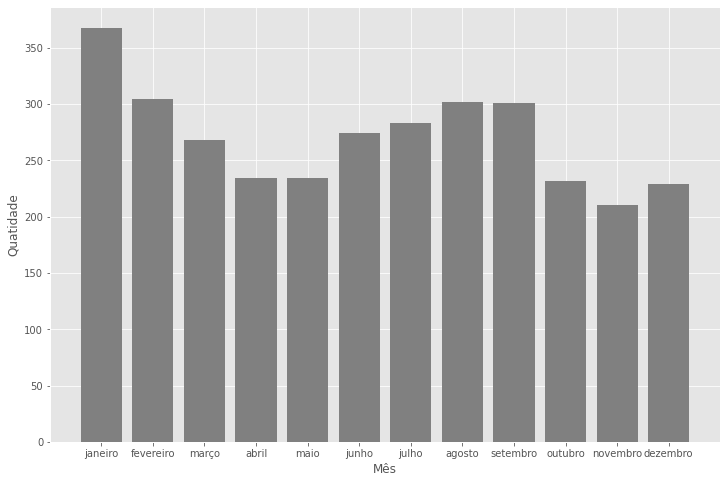

In [48]:
# gráfico
x = np.array(dados['MES'].unique())
y = [368, 305, 268, 234, 234, 274,283, 302, 301, 232, 210, 229]
plt.figure(figsize=(12,8))
plt.bar(x,y, color='Gray')
plt.xlabel('Mês')
plt.ylabel('Quatidade')
plt.show()


A maioria das denúncias são denominadas como injúria e aproximadamente 2% é titulada como Ultraje a Culto e Impedimento ou Perturbação de Ato a ele Relativo. Mais de 90% das denúncias não estão direcionadas a uma lei e 7% se enquada na Maria da Penha. 


In [50]:
dados['titulo'].value_counts()*100/3240

Injúria por preconceito                                               88.425926
Preconceito de Raça ou de Cor                                          9.413580
Ultraje a Culto e Impedimento ou Perturbação de Ato a ele Relativo     2.160494
Name: titulo, dtype: float64

In [52]:
titulo = ['Injúria por preconceito', 'Preconceito de Raça ou de Cor',
       'Ultraje a Culto e Impedimento ou Perturbação de Ato a ele Relativo']

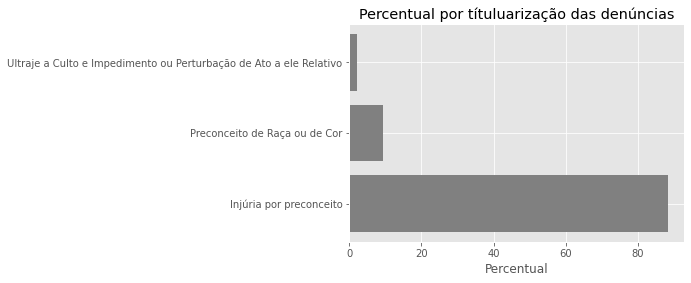

In [59]:
titulo = ['Injúria por preconceito', 'Preconceito de Raça ou de Cor',
       'Ultraje a Culto e Impedimento ou Perturbação de Ato a ele Relativo']
y2 = [88.4, 9.4, 2.2]
plt.barh(titulo, y2,color='Gray')
plt.title("Percentual por títuluarização das denúncias")
plt.xlabel('Percentual')
plt.show()

In [62]:
dados['lei'].value_counts()*100/3240

Não                   91.111111
Lei Maria da Penha     7.129630
Lei 9.099/95           1.759259
Name: lei, dtype: float64

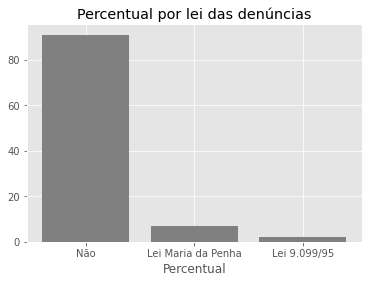

In [96]:
lei = ['Não', 'Lei Maria da Penha', 'Lei 9.099/95' ]
y4 = [91, 7, 2]
plt.bar(lei, y4,color='Gray')
plt.title("Percentual por lei das denúncias")
plt.xlabel('Percentual')
plt.show()

Grande parte dos crimes de intolerância religiosa nessa janela temporal ocorreram no Centro-RJ , mas 157 não foram informado o bairro e 90 não tinha o bairro cadastro nos sistemas de delegacia. 

51% das denúncias são do municipio do Rio de Janeiro, seguido de 5% Niterói e 4% Nova Iguaçu.
  
O local do crime é predominate em residência da vítima, mas 17% é em via pública e 13% em outros locais não definidos. [gráfico dos 20 locais com maior número denuncia]
  
Apenas 387 das denúnicas são feitas em delegacias específicas ao combate de crimes raciais e delitos de intolerância. 
  
  [Gráficos com o bairro e municipio os 20 com maior número de denuncia e os 20 com menor número]

<AxesSubplot:title={'center':'Os 10 bairros com mair número de fatos'}>

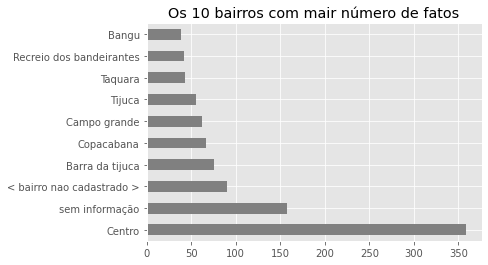

In [79]:
dados['bairro_fato'].value_counts().head(10).plot(kind='barh', color='gray', title='Os 10 bairros com mair número de fatos')

In [81]:
mun = pd.DataFrame(dados['municipio_fato'].value_counts().head(10))

In [83]:
mun['Percent'] = mun['municipio_fato']*100/3240

In [84]:
mun

,municipio_fato,Percent
Rio de Janeiro,1664,51.358025
Niterói,150,4.629630
Nova Iguaçu,130,4.012346
Duque de Caxias,99,3.055556
São Gonçalo,91,2.808642
Petrópolis,63,1.944444
Nova Friburgo,58,1.790123
Volta Redonda,51,1.574074
Teresópolis,45,1.388889
São João de Meriti,43,1.327160


In [25]:
dados['municipio_fato'].isnull().value_counts()

False    3240
Name: municipio_fato, dtype: int64

In [27]:
dados['local'].value_counts()*100/3240

Residência                            26.635802
Via pública                           17.098765
Outros                                12.623457
Ambiente virtual                       8.549383
Estabelecimento comercial              7.901235
Condomínio                             6.296296
Ignorado                               2.993827
Hospital                               2.345679
Bar/restaurante                        1.697531
Instituição religiosa                  1.512346
Estabelecimento de ensino              1.481481
Estab. público municipal               1.358025
Shopping center                        1.234568
Supermercado                           1.018519
Vila                                   0.833333
Sem informação                         0.740741
Estabelecimento financeiro             0.648148
Estabelecimento hoteleiro              0.493827
Estab. público estadual                0.401235
Escritório                             0.370370
Estab. público federal                 0

In [28]:
dados['DP'].value_counts()

Delegacia de Combate a Crimes Raciais e Delitos de Intolerância    387
032a. Taquara                                                       83
016a. Barra da Tijuca                                               76
035a. Campo Grande                                                  61
042a. Recreio                                                       52
                                                                  ... 
098a. Paulo de Frontin                                               1
140a. Natividade                                                     1
Delegacia de Atendimento ao Turista                                  1
135a. Itaocara                                                       1
121a. Casimiro de Abreu                                              1
Name: DP, Length: 161, dtype: int64

In [30]:
for (row, col) in dados.iterrows():
    if col.RISP == 'RISP 01':
        dados['RISP'].replace(to_replace=col.RISP, value='Capital (Zona Sul, Centro e parte da Norte)', inplace=True)
    if col.RISP == 'RISP 02':
        dados['RISP'].replace(to_replace=col.RISP, value='Capital (Zona Oeste e parte da Norte)', inplace=True)
    if col.RISP == 'RISP 03':
        dados['RISP'].replace(to_replace=col.RISP, value='Baixada Fluminense', inplace=True)
    if col.RISP == 'RISP 04':
        dados['RISP'].replace(to_replace=col.RISP, value='Grande Niterói e Região dos Lagos', inplace=True)
    if col.RISP == 'RISP 05':
        dados['RISP'].replace(to_replace=col.RISP, value='Sul Fluminense', inplace=True)
    if col.RISP == 'RISP 06':
        dados['RISP'].replace(to_replace=col.RISP, value='Norte Fluminense e Noroeste', inplace=True)
    if col.RISP == 'RISP 07':
        dados['RISP'].replace(to_replace=col.RISP, value='Região Serrana', inplace=True)
   

In [31]:
dados['RISP'].value_counts()

Capital (Zona Sul, Centro e parte da Norte)    889
Capital (Zona Oeste e parte da Norte)          775
Grande Niterói e Região dos Lagos              459
Baixada Fluminense                             452
Sul Fluminense                                 262
Região Serrana                                 229
Norte Fluminense e Noroeste                    174
Name: RISP, dtype: int64

Recorte para o crimes que se enquadra em 
 - Ultraje a Culto e Impedimento ou Perturbação de Ato a ele Relativo

Entre 2019 e 2021 há 70 denúncias para o título enquadrado em Ultraje a Culto e Impedimento ou Perturbação de Ato a ele Relativo, destes 41% é de 2019 e os mês que mais engloba denúncias nos três anos é Outubro com 13%, janeiro com 11% e abril é o mês com menor número denuncias, 3%.

56 denúncias das 70 está direcionada a Lei 9.099/95, 

Quanto a localidade  a maioria dos fatos acontecem Centro-RJ, com 8% não tendo o bairro cadastrado. Quando observamos dados de município do fato Rio de Janeiro tem registrado metade das denúncias.

Diferente dados geral, temos que o local que mais ocorre o crime contra Ultraje ... é Instituções religiosas,41% e residência da vítima 23%.

Como em geral a delegacia que mais recebe denuncias dessa titularização é a DECRADI. 

In [85]:
dados2 = pd.DataFrame(dados.loc[dados['titulo'] == 'Ultraje a Culto e Impedimento ou Perturbação de Ato a ele Relativo'])

In [34]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 39 to 3884
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   controle        70 non-null     object 
 1   ano             70 non-null     int64  
 2   MES             70 non-null     object 
 3   titulo          70 non-null     object 
 4   lei             70 non-null     object 
 5   conteudo        70 non-null     object 
 6   DP              70 non-null     object 
 7   cisp            70 non-null     object 
 8   data_com        70 non-null     object 
 9   data_fato       70 non-null     object 
 10  hora_com        70 non-null     object 
 11  hora_fato       70 non-null     object 
 12  bairro_fato     70 non-null     object 
 13  municipio_fato  70 non-null     object 
 14  AISP            70 non-null     object 
 15  RISP            70 non-null     object 
 16  local           70 non-null     object 
 17  sexo            70 non-null     ob

In [86]:
# Gráfico
dados2['ano'].value_counts()

2019    29
2020    22
2021    19
Name: ano, dtype: int64

<AxesSubplot:title={'center':'Denúncias por mês de 2019 a 2021'}>

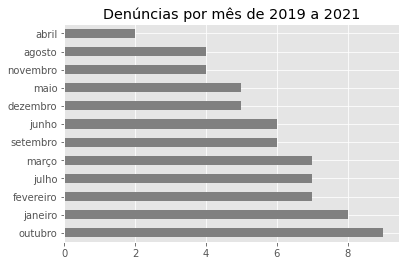

In [93]:
dados2['MES'].value_counts().plot(kind='barh', color='gray', title=('Denúncias por mês de 2019 a 2021'))

In [38]:
# Gráfico
dados2['lei'].value_counts()

Lei 9.099/95          56
Não                   13
Lei Maria da Penha     1
Name: lei, dtype: int64

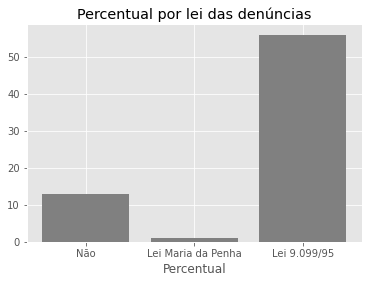

In [95]:
lei = ['Não', 'Lei Maria da Penha', 'Lei 9.099/95' ]
y5 = [13, 1, 56]
plt.bar(lei, y5,color='Gray')
plt.title("Percentual por lei das denúncias")
plt.xlabel('Percentual')
plt.show()

In [39]:
dados2['conteudo'].value_counts()

casos    70
Name: conteudo, dtype: int64

<AxesSubplot:title={'center':'Os 10 bairros do fato com maior número de denúncias'}>

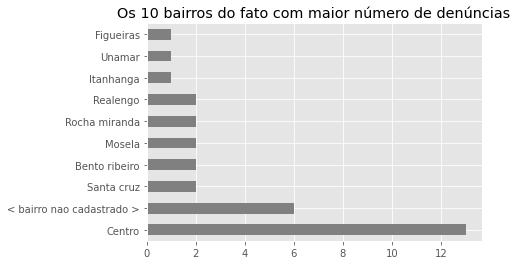

In [98]:
# Gráfico
dados2['bairro_fato'].value_counts().head(10).plot(kind='barh',color='gray', title='Os 10 bairros do fato com maior número de denúncias')

In [104]:
mun_recorte = pd.DataFrame(dados2['municipio_fato'].value_counts().head(10))

In [105]:
mun_recorte['Percent %'] = mun_recorte['municipio_fato']*100/70

In [106]:
mun_recorte

,municipio_fato,Percent %
Rio de Janeiro,35,50.000000
Saquarema,3,4.285714
Maricá,3,4.285714
Petrópolis,3,4.285714
Nova Iguaçu,2,2.857143
São Gonçalo,2,2.857143
São João de Meriti,2,2.857143
Volta Redonda,2,2.857143
Niterói,2,2.857143
Macaé,1,1.428571


In [107]:
local_recorte = pd.DataFrame(dados2['local'].value_counts()*100/70)

In [108]:
local_recorte

,local
Instituição religiosa,41.428571
Residência,22.857143
Outros,14.285714
Via pública,10.000000
Condomínio,2.857143
Estab. público estadual,1.428571
Ignorado,1.428571
Ambiente virtual,1.428571
Estabelecimento comercial,1.428571
Estab. público municipal,1.428571


In [113]:
x = local_recorte.index.tolist()
y =local_recorte['local'].tolist()

<BarContainer object of 11 artists>

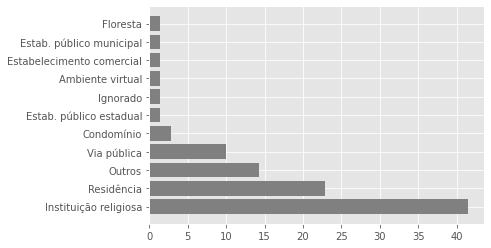

In [116]:
plt.barh(x,y, color='gray')

In [118]:
#gráfico
dp_recorte = pd.DataFrame(dados2['DP'].value_counts().head(10))

In [120]:
dp_recorte['Percent'] = dp_recorte['DP']*100/70

In [121]:
dp_recorte

,DP,Percent
Delegacia de Combate a Crimes Raciais e Delitos de Intolerância,13,18.571429
082a. Maricá,3,4.285714
026a. Todos os Santos,3,4.285714
124a. Saquarema,3,4.285714
105a. Petrópolis,3,4.285714
043a. Pedra de Guaratiba,2,2.857143
076a. Niterói - Centro,2,2.857143
036a. Santa Cruz,2,2.857143
030a. Marechal Hermes,2,2.857143
004a. Praça da República,2,2.857143


In [44]:
# talvez um mapa
dados2['RISP'].value_counts()

Capital (Zona Sul, Centro e parte da Norte)    20
Capital (Zona Oeste e parte da Norte)          15
Grande Niterói e Região dos Lagos              14
Baixada Fluminense                              8
Sul Fluminense                                  5
Região Serrana                                  4
Norte Fluminense e Noroeste                     4
Name: RISP, dtype: int64

Vítimas

Para a análise de vítimas foram considerados todas as linhas do arquivo recebido. Assim tem 3903 registros de 2019 a 2020, destes 3826 é vítima e 77 casos.

52% das vítimas são do sexo feminino, a média idade das vítimas é de  33 anos e 72% delas são negras.

[Gráficos]

24% das vítmas possuem o ensino médio completo
[gráfico]

28% das vítmas ignorou o campo profissão, 9% definiu com outros  e 8% definiu como estudante.

[gráfico 20 mais respondido]

Quanto ao bairro a maior foi ignorado e o quanto ao municipio 44% das vitimas são da cidade do Rio de Janeiro[Gráficos]

In [53]:
dados_vit = pd.read_csv('bases/dados_rj.csv')

In [54]:
dados_vit .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   controle        3903 non-null   object 
 1   ano             3903 non-null   int64  
 2   MES             3903 non-null   object 
 3   titulo          3903 non-null   object 
 4   lei             3903 non-null   object 
 5   conteudo        3903 non-null   object 
 6   DP              3903 non-null   object 
 7   cisp            3903 non-null   object 
 8   data_com        3903 non-null   object 
 9   data_fato       3903 non-null   object 
 10  hora_com        3903 non-null   object 
 11  hora_fato       3903 non-null   object 
 12  bairro_fato     3903 non-null   object 
 13  municipio_fato  3903 non-null   object 
 14  AISP            3903 non-null   object 
 15  RISP            3903 non-null   object 
 16  local           3903 non-null   object 
 17  sexo            3825 non-null   o

In [55]:
dados_vit['conteudo'].value_counts()

vítimas    3826
casos        77
Name: conteudo, dtype: int64

Todos nulos, sem informações e não se aplica foram substituidos por ignorados

In [61]:
dados_vit['sexo'].isnull().value_counts()

False    3903
Name: sexo, dtype: int64

In [66]:
dados_vit.fillna('ignorado', inplace=True)

In [69]:
dados_vit = dados_vit.replace('não se aplica', 'ignorado')

In [70]:
dados_vit = dados_vit.replace('sem informação', 'ignorado')

In [71]:
dados_vit['sexo'].value_counts()

feminino     2018
masculino    1561
ignorado      324
Name: sexo, dtype: int64

In [74]:
#Grafico
dados_vit['sexo'].value_counts()*100/3903

feminino     51.703818
masculino    39.994876
ignorado      8.301307
Name: sexo, dtype: float64

In [82]:
dados_vit['idade'].describe()

count    3903.000000
mean       33.226492
std        19.124211
min         0.000000
25%        23.000000
50%        33.000000
75%        45.000000
max        90.000000
Name: idade, dtype: float64

In [81]:
dados_vit['idade'].unique()

array([19., 78., 24., 61., 33., 64., 63., 68., 45., 23., 39., 46., 37.,
       27., 29.,  0., 32., 59., 18., 31., 28., 25., 69., 21., 66., 50.,
       11., 51., 55., 17., 56., 22.,  9., 13., 41., 49., 36., 38., 47.,
        5., 20., 40., 35., 34., 71., 26., 42., 43., 87., 57., 70., 89.,
       30., 58., 65., 60., 67., 10., 48., 12., 79., 54., 74., 76., 62.,
       15.,  8., 86., 75., 16., 53., 52., 44., 72., 14.,  4., 77., 85.,
        7., 80.,  3., 73.,  2., 81., 82., 84., 83.,  6., 90.,  1., 88.])

In [80]:
dados_vit['idade'] = dados_vit['idade'].replace('ignorado', 0)

<AxesSubplot:>

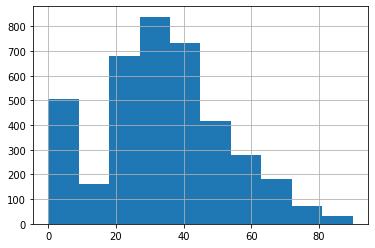

In [83]:
# melhorar histograma
dados_vit['idade'].hist()

In [84]:
for (row, col) in dados_vit.iterrows():
    if col.cor == 'parda':
        dados_vit['cor'].replace(to_replace=col.cor, value='negra', inplace=True)
   

In [86]:
dados_vit['cor'].value_counts()*100/3903

negra       71.611581
branca      17.038176
ignorado    11.017166
amarela      0.256213
índio        0.076864
Name: cor, dtype: float64

<AxesSubplot:>

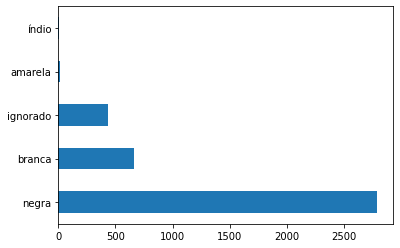

In [88]:
#melhorar gráfico
dados_vit['cor'].value_counts().plot(kind='barh')

In [91]:
dados_vit['escolaridade'].value_counts()*100/3903

2º Grau completo       23.750961
Sem informação         14.681015
Ignorado               13.297463
1º Grau incompleto     12.451960
3º Grau completo        9.684858
3º Grau incompleto      6.789649
2º Grau incompleto      6.789649
1º Grau completo        5.559826
ignorado                3.971304
Não alfabetizado(a)     1.024853
Alfabetizado(a)         1.024853
Especialização          0.691776
Mestrado                0.153728
Doutorado               0.128107
Name: escolaridade, dtype: float64

In [95]:
#gráfico
dados_vit['profissao'].value_counts()*100/3903

ignorado                     28.900846
Outros                        9.326159
Estudante                     7.660774
Do lar                        5.201127
Aposentado(a)                 3.458878
                               ...    
Físico(a)                     0.025621
Oficial de justiça            0.025621
Operador(a) financeiro(a)     0.025621
Sociólogo(a)                  0.025621
Locutor(a) de rádio           0.025621
Name: profissao, Length: 215, dtype: float64

In [93]:
dados_vit['profissao'] = dados_vit['profissao'].replace('Ignorado', 'ignorado')

In [103]:
dados_vit['relacao'].value_counts()

Nenhuma               1354
ignorado               678
Vizinho(a)             607
Outra                  573
Colega de trabalho     104
Cliente                102
Ex-companheiro(a)       50
Cunhado(a)              40
Filho(a)                33
Companheiro(a)          30
Amigo(a)                27
Empregado(a)            26
Patrão(oa)              25
Tio(a)                  25
Irmão(a)                25
Sogro(a)                19
Genro                   18
Ex-patrão(oa)           15
Ex-namorado             15
Neto(a)                 14
Padrasto                13
Aluno(a)                13
Ex-cônjuge              12
Pai                     12
Sobrinho(a)             10
Cônjuge                 10
Avô(a)                   7
Nora                     7
Mãe                      7
Primo(a)                 6
Enteado(a)               6
Ex-cunhado(a)            6
Namorado(a)              5
Madrasta                 5
Professor(a)             4
Name: relacao, dtype: int64

In [99]:
dados_vit['relacao'] = dados_vit['relacao'].replace('Ignorado', 'ignorado')

In [98]:
dados_vit['relacao'] = dados_vit['relacao'].replace('Não se aplica', 'ignorado')

In [101]:
dados_vit['relacao'] = dados_vit['relacao'].replace('Sem informação', 'ignorado')

In [102]:
dados_vit['bairro_vit'].value_counts()

ignorado                     529
Centro                       163
< bairro nao cadastrado >     75
Campo grande                  54
Copacabana                    51
                            ... 
Jacina                         1
Perobas (pachecos)             1
Hingianopolis                  1
Vila meriti                    1
Rio do limao                   1
Name: bairro_vit, Length: 1096, dtype: int64

In [105]:
dados_vit['municipio_vit'].value_counts()*100/3903

Rio de janeiro       43.633103
ignorado             10.146042
Niteroi               3.766334
Sao goncalo           3.715091
Nova iguacu           3.561363
                       ...    
Osasco                0.025621
Macuco                0.025621
Casimiro de abreu     0.025621
Sem municipio         0.025621
Cardoso moreira       0.025621
Name: municipio_vit, Length: 107, dtype: float64

Recorte para o crimes que se enquadra em 
 - Ultraje a Culto e Impedimento ou Perturbação de Ato a ele Relativo

Ao fazer o recorte observamos que todas denúncias com titularização desse recorte são denominados como conteúdo de casos e não nenhuma informação sobre sexo, raça, idade e território.

In [107]:
dados_vit2 = pd.DataFrame(dados_vit.loc[dados_vit['titulo'] == 'Ultraje a Culto e Impedimento ou Perturbação de Ato a ele Relativo'])

In [108]:
dados_vit2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 39 to 3884
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   controle        77 non-null     object 
 1   ano             77 non-null     int64  
 2   MES             77 non-null     object 
 3   titulo          77 non-null     object 
 4   lei             77 non-null     object 
 5   conteudo        77 non-null     object 
 6   DP              77 non-null     object 
 7   cisp            77 non-null     object 
 8   data_com        77 non-null     object 
 9   data_fato       77 non-null     object 
 10  hora_com        77 non-null     object 
 11  hora_fato       77 non-null     object 
 12  bairro_fato     77 non-null     object 
 13  municipio_fato  77 non-null     object 
 14  AISP            77 non-null     object 
 15  RISP            77 non-null     object 
 16  local           77 non-null     object 
 17  sexo            77 non-null     ob

In [110]:
dados_vit2['conteudo'].value_counts()

casos    77
Name: conteudo, dtype: int64

In [109]:
dados_vit2['sexo'].value_counts()

ignorado    77
Name: sexo, dtype: int64

In [112]:
dados_vit2['idade'].describe()

count    77.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: idade, dtype: float64

In [113]:
dados_vit2['cor'].value_counts()

ignorado    77
Name: cor, dtype: int64

In [114]:
dados_vit2['cor'].isnull().value_counts()

False    77
Name: cor, dtype: int64

In [116]:
dados_vit2['escolaridade'].value_counts()

ignorado    77
Name: escolaridade, dtype: int64

In [120]:
dados2_2020_2['profissao'].value_counts()

sem informação               137
Ignorado                      83
Outros                        69
Estudante                     63
Aposentado(a)                 33
                            ... 
Técnico(a) em informática      1
Pintor(a)                      1
Estoquista                     1
Projetista                     1
Auxiliar de escritório         1
Name: profissao, Length: 119, dtype: int64

In [119]:
dados_vit2['relacao'].value_counts()

ignorado    77
Name: relacao, dtype: int64

In [120]:
dados_vit2['bairro_vit'].value_counts()

ignorado    77
Name: bairro_vit, dtype: int64

In [121]:
dados_vit2['municipio_vit'].value_counts()

ignorado    77
Name: municipio_vit, dtype: int64